# Lab 3: Training Deep Recurrent Neural Network


## Lab Instruction - Emojify

In this lab, you will learn to train a deep Recurrent neural network using Keras library with Tensorflow backend. Your task is to do the sentimental analysis which you will predict the emoji that represent the emotion in each sentence.


In [315]:
# Import require library
from keras import *
from keras.preprocessing import text
from keras.preprocessing import sequence

In [316]:
from sklearn.model_selection import train_test_split

import _utils as fn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read data

In [317]:
# import data
df = pd.read_csv('/content/emoji_data.csv')
df.describe()

,emoji
count,7480.000000
mean,2.977273
std,1.999269
min,0.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,6.000000


In [222]:
df.head()

,sentence,emoji
0,"During the period of falling in love, each tim...",0
1,When I was involved in a traffic accident.,1
2,When I was driving home after several days of...,2
3,When I lost the person who meant the most to me.,3
4,The time I knocked a deer down - the sight of ...,4


In [223]:
x = df['sentence'].values
y = df['emoji'].values

In [224]:
x[0]

'During the period of falling in love, each time that we met and especially when we had not met for a long time.'

In [225]:
y[0]

0

### Split train test

In [226]:
# Split train test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.3,stratify=y,random_state=0)
# Split train validate
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size =0.1,stratify=y,random_state=0)

Text(0.5, 1.0, 'y val')

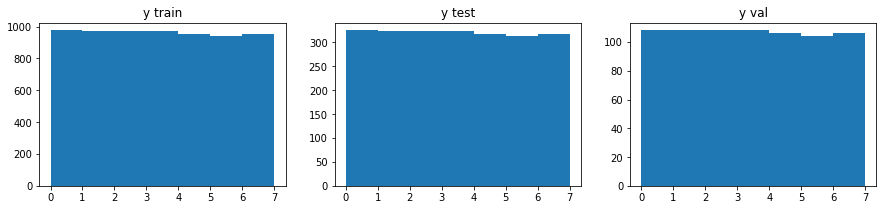

In [227]:
# Plot target distribution
fig,ax =plt.subplots(1,3,figsize=(15,3))

bins = [0,1,2,3,4,5,6,7]

ax[0].hist(y_train,bins=bins)
ax[0].set_title('y train')
ax[1].hist(y_test,bins=bins)
ax[1].set_title('y test')
ax[2].hist(y_val,bins=bins)
ax[2].set_title('y val')

### Preprocess data: Tokenizer & Padding

In [228]:
# Define parameter
max_word = 100000
maxlen = 1000
max_features = 100000

In [229]:
# Define Tokenizer
tokenizer = text.Tokenizer(num_words = max_word) #define corpus  to keep maximum number of words 
tokenizer.fit_on_texts(x_train)

In [230]:
tokenizer.word_index

{'i': 1,
 'the': 2,
 'a': 3,
 'to': 4,
 'my': 5,
 'and': 6,
 'was': 7,
 'when': 8,
 'of': 9,
 'in': 10,
 'had': 11,
 'me': 12,
 'that': 13,
 'for': 14,
 'not': 15,
 'with': 16,
 'it': 17,
 'at': 18,
 'on': 19,
 'he': 20,
 'very': 21,
 'friend': 22,
 'felt': 23,
 'an': 24,
 'she': 25,
 'her': 26,
 'we': 27,
 'one': 28,
 'as': 29,
 'about': 30,
 'this': 31,
 'from': 32,
 'after': 33,
 'time': 34,
 'by': 35,
 'were': 36,
 'did': 37,
 'but': 38,
 'out': 39,
 'him': 40,
 'who': 41,
 'because': 42,
 'his': 43,
 'been': 44,
 'got': 45,
 'have': 46,
 'some': 47,
 'which': 48,
 'home': 49,
 'would': 50,
 'friends': 51,
 'up': 52,
 'told': 53,
 'so': 54,
 'day': 55,
 'mother': 56,
 'they': 57,
 'be': 58,
 'do': 59,
 'school': 60,
 'people': 61,
 'went': 62,
 'person': 63,
 'there': 64,
 'saw': 65,
 'our': 66,
 'first': 67,
 'is': 68,
 'could': 69,
 'came': 70,
 'night': 71,
 'father': 72,
 'go': 73,
 'all': 74,
 "didn't": 75,
 'made': 76,
 'mine': 77,
 'girl': 78,
 'having': 79,
 'back': 80,
 'o

In [231]:
tokenizer.num_words

50000

In [232]:
# Preprocess data function
def preprocess_fn(data):
    sequeces = tokenizer.texts_to_sequences(data)
    padding_sequences = sequence.pad_sequences(sequeces,maxlen = maxlen)
    
    return padding_sequences,sequeces

In [233]:
# Preprocess data
x_train,sequeces_x_train =  preprocess_fn(x_train)
x_val,sequeces_x_val = preprocess_fn(x_val)
x_test,sequeces_x_test = preprocess_fn(x_test)

In [234]:
x_train

array([[   0,    0,    0, ...,    6, 1529,   93],
       [   0,    0,    0, ...,  408,    4,   12],
       [   0,    0,    0, ...,   11,  172,  173],
       ...,
       [   0,    0,    0, ...,  127,    5,   22],
       [   0,    0,    0, ...,   86, 1403,   12],
       [   0,    0,    0, ...,  981,    4,   12]], dtype=int32)

In [235]:
sequeces_x_train

[[188,
  9,
  3,
  1406,
  3199,
  27,
  11,
  4,
  221,
  17,
  107,
  42,
  5,
  100,
  240,
  2584,
  4,
  17,
  27,
  202,
  17,
  4,
  3,
  98,
  41,
  402,
  784,
  6,
  1528,
  9,
  81,
  784,
  14,
  338,
  4,
  719,
  27,
  62,
  4,
  345,
  66,
  3199,
  17,
  7,
  314,
  561,
  35,
  2,
  81,
  4453,
  6,
  1529,
  93],
 [1, 46, 23, 31, 161, 8, 3, 63, 164, 1, 661, 6, 720, 408, 4, 12],
 [304,
  18,
  321,
  87,
  721,
  4,
  345,
  3,
  96,
  456,
  10,
  242,
  33,
  26,
  188,
  1,
  23,
  21,
  111,
  6,
  1204,
  1,
  11,
  172,
  173],
 [1,
  688,
  4,
  5,
  56,
  19,
  2,
  507,
  25,
  11,
  1663,
  508,
  6,
  7,
  382,
  4,
  58,
  2162,
  1,
  374,
  4,
  578,
  26,
  2,
  633,
  9,
  2,
  579,
  6,
  133,
  130,
  2163,
  66,
  562,
  25,
  202,
  12,
  2,
  633,
  10,
  722],
 [8,
  4454,
  16,
  3200,
  457,
  1664,
  114,
  5,
  121,
  6,
  1882,
  12,
  4,
  221,
  88,
  152,
  103,
  383,
  188],
 [45, 220, 67, 1142, 143],
 [8,
  1,
  458,
  13,
  1,
  11,
  

### Build a model with word embedding

In [277]:
# Define model
rnn =models.Sequential()
rnn.add(layers.Embedding(max_features,32,input_length=maxlen))

rnn.add(layers.SimpleRNN(32))
rnn.add(layers.Dense(64,activation='elu'))
rnn.add(layers.Dense(7,activation='softmax'))

In [278]:
# Compile model
rnn.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [279]:
# Show model structure
rnn.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_28 (Embedding)    (None, 200, 32)           1600000   
                                                                 
 simple_rnn_13 (SimpleRNN)   (None, 32)                2080      
                                                                 
 dense_50 (Dense)            (None, 64)                2112      
                                                                 
 dense_51 (Dense)            (None, 7)                 455       
                                                                 
Total params: 1,604,647
Trainable params: 1,604,647
Non-trainable params: 0
_________________________________________________________________


In [280]:
# Fit model
his =  rnn.fit(x_train,y_train,epochs=5,batch_size=32,validation_data=(x_val,y_val))

Epoch 1/5
211/211 [==============================] - 12s 50ms/step - loss: 1.9211 - acc: 0.1888 - val_loss: 1.8333 - val_acc: 0.2714
Epoch 2/5
211/211 [==============================] - 10s 48ms/step - loss: 1.5987 - acc: 0.4067 - val_loss: 1.6354 - val_acc: 0.3396
Epoch 3/5
211/211 [==============================] - 10s 48ms/step - loss: 1.2001 - acc: 0.5768 - val_loss: 1.6055 - val_acc: 0.3984
Epoch 4/5
211/211 [==============================] - 11s 50ms/step - loss: 0.8751 - acc: 0.7069 - val_loss: 1.7371 - val_acc: 0.3890
Epoch 5/5
211/211 [==============================] - 11s 50ms/step - loss: 0.6135 - acc: 0.8020 - val_loss: 1.9552 - val_acc: 0.3864


Last train accuracy: 0.8019905090332031
Last validation accuracy: 0.3863636255264282


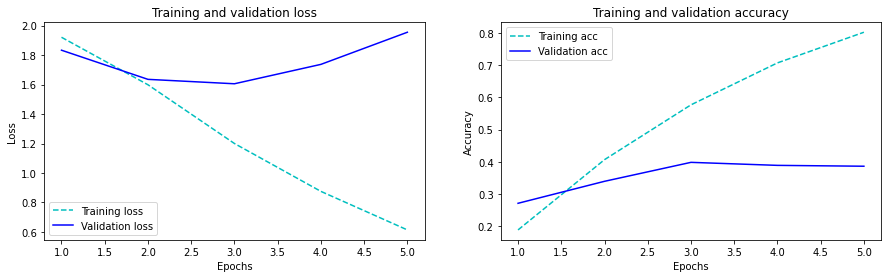

In [281]:
# Plot accuracy and loss over each epochs
fn.show_result(his)

In [282]:
# Define model
rnn =models.Sequential()
rnn.add(layers.Embedding(max_features,32,input_length=maxlen))

rnn.add(layers.SimpleRNN(32))
rnn.add(layers.Dense(64,activation='elu'))
rnn.add(layers.Dense(7,activation='softmax'))

# Compile model
rnn.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['acc'])

# Show model structure
rnn.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_29 (Embedding)    (None, 200, 32)           1600000   
                                                                 
 simple_rnn_14 (SimpleRNN)   (None, 32)                2080      
                                                                 
 dense_52 (Dense)            (None, 64)                2112      
                                                                 
 dense_53 (Dense)            (None, 7)                 455       
                                                                 
Total params: 1,604,647
Trainable params: 1,604,647
Non-trainable params: 0
_________________________________________________________________


In [283]:
# Define callbacks
from keras import callbacks
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience = 2)

In [284]:
his1_earlyStop=rnn.fit(x_train,y_train,epochs=10,batch_size=32,validation_data=(x_val,y_val) ,callbacks=[early_stop])

Epoch 1/10
211/211 [==============================] - 12s 50ms/step - loss: 1.9187 - acc: 0.1977 - val_loss: 1.8454 - val_acc: 0.2660
Epoch 2/10
211/211 [==============================] - 10s 49ms/step - loss: 1.5730 - acc: 0.4226 - val_loss: 1.6716 - val_acc: 0.3663
Epoch 3/10
211/211 [==============================] - 10s 50ms/step - loss: 1.1556 - acc: 0.6041 - val_loss: 1.6443 - val_acc: 0.4184
Epoch 4/10
211/211 [==============================] - 10s 49ms/step - loss: 0.8212 - acc: 0.7267 - val_loss: 1.9361 - val_acc: 0.3757
Epoch 5/10
211/211 [==============================] - 11s 50ms/step - loss: 0.5568 - acc: 0.8223 - val_loss: 2.1666 - val_acc: 0.3971


Last train accuracy: 0.8223410844802856
Last validation accuracy: 0.3970588147640228


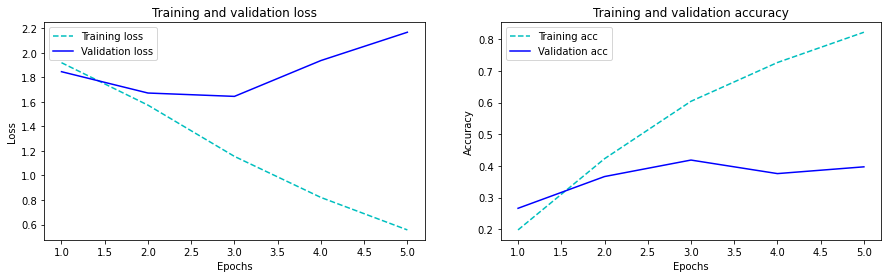

In [285]:
# Plot accuracy and loss over each epochs
fn.show_result(his1_earlyStop)

###LSTM

In [286]:
# Define model
lstm =models.Sequential()
lstm.add(layers.Embedding(max_features,32,input_length=maxlen))

lstm.add(layers.LSTM(32))
lstm.add(layers.Dense(64,activation='elu'))
lstm.add(layers.Dense(7,activation='softmax'))

In [287]:
# Compile model
lstm.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [288]:
# Show model structure
lstm.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_30 (Embedding)    (None, 200, 32)           1600000   
                                                                 
 lstm_19 (LSTM)              (None, 32)                8320      
                                                                 
 dense_54 (Dense)            (None, 64)                2112      
                                                                 
 dense_55 (Dense)            (None, 7)                 455       
                                                                 
Total params: 1,610,887
Trainable params: 1,610,887
Non-trainable params: 0
_________________________________________________________________


In [289]:
# Fit model
his2 =  lstm.fit(x_train,y_train,epochs=10,batch_size=32,validation_data=(x_val,y_val))

Epoch 1/10
211/211 [==============================] - 18s 76ms/step - loss: 1.8585 - acc: 0.2185 - val_loss: 1.7311 - val_acc: 0.3061
Epoch 2/10
211/211 [==============================] - 15s 73ms/step - loss: 1.5323 - acc: 0.3859 - val_loss: 1.5503 - val_acc: 0.3797
Epoch 3/10
211/211 [==============================] - 16s 76ms/step - loss: 1.3004 - acc: 0.5043 - val_loss: 1.4505 - val_acc: 0.4452
Epoch 4/10
211/211 [==============================] - 16s 75ms/step - loss: 1.1268 - acc: 0.5792 - val_loss: 1.4284 - val_acc: 0.4853
Epoch 5/10
211/211 [==============================] - 16s 75ms/step - loss: 0.9874 - acc: 0.6459 - val_loss: 1.4494 - val_acc: 0.4920
Epoch 6/10
211/211 [==============================] - 16s 76ms/step - loss: 0.8715 - acc: 0.6958 - val_loss: 1.4224 - val_acc: 0.5254
Epoch 7/10
211/211 [==============================] - 16s 74ms/step - loss: 0.7686 - acc: 0.7415 - val_loss: 1.4685 - val_acc: 0.5267
Epoch 8/10
211/211 [==============================] - 15s 73ms

Last train accuracy: 0.8238264918327332
Last validation accuracy: 0.5521390438079834


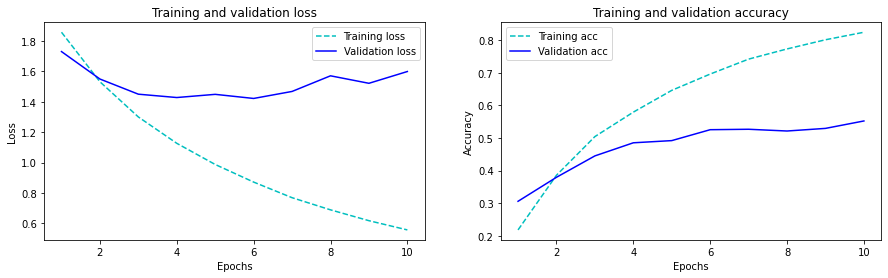

In [290]:
# Plot accuracy and loss over each epochs
fn.show_result(his2)

In [291]:
# Define model
lstm =models.Sequential()
lstm.add(layers.Embedding(max_features,32,input_length=maxlen))

lstm.add(layers.LSTM(64))
lstm.add(layers.Dense(64,activation='elu'))
lstm.add(layers.Dense(7,activation='softmax'))

# Compile model
lstm.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['acc'])

# Show model structure
lstm.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_31 (Embedding)    (None, 200, 32)           1600000   
                                                                 
 lstm_20 (LSTM)              (None, 64)                24832     
                                                                 
 dense_56 (Dense)            (None, 64)                4160      
                                                                 
 dense_57 (Dense)            (None, 7)                 455       
                                                                 
Total params: 1,629,447
Trainable params: 1,629,447
Non-trainable params: 0
_________________________________________________________________


In [292]:
# Define callbacks
from keras import callbacks
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience = 2)

In [293]:
his2_earlyStop=lstm.fit(x_train,y_train,epochs=10,batch_size=32,validation_data=(x_val,y_val) ,callbacks=[early_stop])

Epoch 1/10
211/211 [==============================] - 21s 89ms/step - loss: 1.8350 - acc: 0.2533 - val_loss: 1.6005 - val_acc: 0.4078
Epoch 2/10
211/211 [==============================] - 18s 86ms/step - loss: 1.3778 - acc: 0.4942 - val_loss: 1.3540 - val_acc: 0.4947
Epoch 3/10
211/211 [==============================] - 18s 87ms/step - loss: 1.0825 - acc: 0.6130 - val_loss: 1.3634 - val_acc: 0.5094
Epoch 4/10
211/211 [==============================] - 18s 86ms/step - loss: 0.9056 - acc: 0.6857 - val_loss: 1.3010 - val_acc: 0.5588
Epoch 5/10
211/211 [==============================] - 18s 86ms/step - loss: 0.7896 - acc: 0.7347 - val_loss: 1.3676 - val_acc: 0.5535
Epoch 6/10
211/211 [==============================] - 18s 86ms/step - loss: 0.6977 - acc: 0.7708 - val_loss: 1.4119 - val_acc: 0.5361


Last train accuracy: 0.7707961797714233
Last validation accuracy: 0.5360962748527527


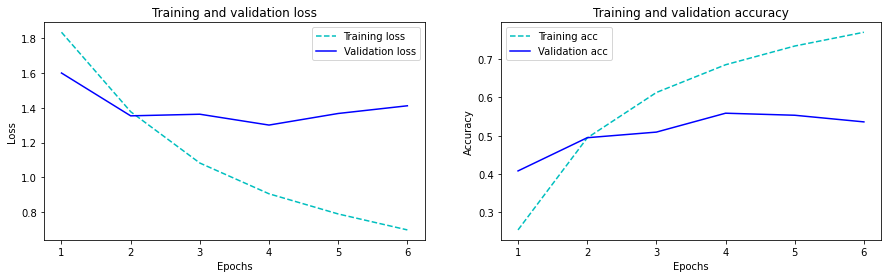

In [294]:
# Plot accuracy and loss over each epochs
fn.show_result(his2_earlyStop)

### Evaluate Model
Baseline of the model is 14.28% (Random prediction)

In [295]:
# Preprocess test data
rnn.evaluate(x_test,y_test)

71/71 [==============================] - 1s 11ms/step - loss: 1.0171 - acc: 0.7032


[1.0171314477920532, 0.7032085657119751]

In [296]:
# Evaluate model with test data

In [297]:
# Show confusino matrix and prediction report
fn.evaluation_report(rnn,x_test,y_test)

[[269  16   3  33   2   2   0]
 [  2 276   5  31   4   4   1]
 [ 12  41 201  38  12  13   7]
 [ 14  20   7 271   2   6   4]
 [ 23  11  22  39 206  12   4]
 [ 27  32  13  35   8 189  10]
 [ 12  29  19  65   7  19 166]]
              precision    recall  f1-score   support

           0       0.75      0.83      0.79       325
           1       0.65      0.85      0.74       323
           2       0.74      0.62      0.68       324
           3       0.53      0.84      0.65       324
           4       0.85      0.65      0.74       317
           5       0.77      0.60      0.68       314
           6       0.86      0.52      0.65       317

    accuracy                           0.70      2244
   macro avg       0.74      0.70      0.70      2244
weighted avg       0.74      0.70      0.70      2244

Loss: 1.0171314477920532 Accuracy: 0.7032085657119751


array([1, 4, 1, ..., 0, 1, 6])

In [298]:
rnn.save('rnnmodel1.h5')

In [299]:
# Preprocess test data
lstm.evaluate(x_test,y_test)

71/71 [==============================] - 1s 20ms/step - loss: 0.8415 - acc: 0.7348


[0.841545045375824, 0.7348484992980957]

In [300]:
# Show confusino matrix and prediction report
fn.evaluation_report(lstm,x_test,y_test)

[[258   8   9  25   7  12   6]
 [  5 278   7   7   8   7  11]
 [  7   9 227   8  17  23  33]
 [ 15  12  20 241   3   9  24]
 [ 13  16  48   2 217  13   8]
 [  7  18  31   6   8 211  33]
 [  3   8  39  12   1  37 217]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.82       325
           1       0.80      0.86      0.83       323
           2       0.60      0.70      0.64       324
           3       0.80      0.74      0.77       324
           4       0.83      0.68      0.75       317
           5       0.68      0.67      0.67       314
           6       0.65      0.68      0.67       317

    accuracy                           0.73      2244
   macro avg       0.74      0.73      0.74      2244
weighted avg       0.74      0.73      0.74      2244

Loss: 0.841545045375824 Accuracy: 0.7348484992980957


array([1, 4, 0, ..., 4, 2, 6])

In [301]:
lstm.save('lstmmodel2.h5')

# ### Play with your model
**Emoji**
0 = joy 😆
1 = fear 😱
2 = anger 😡
3 = sadness 😭
4 = disgust 🤮
5 = shame 😳
6 = guilt 😞

In [302]:
# Define predict function
def predict_emoji(input_text,model):
    
    prepro_input = preprocess_fn([input_text])
    prepro_input = prepro_input[0]
    pred_class = model.predict(prepro_input).argmax(axis =1)
    
    label_to_emoji = ['😆','😱','😡','😭','🤮','😳','😞']
    
    result = label_to_emoji[int(pred_class)]
    
    print('%s %s'%(input_text,result))

In [303]:
# Test your model
input_text ='I like this class'
predict_emoji(input_text,rnn)

I like this class 😆


In [304]:
# Test your model
input_text = 'I like this class'
predict_emoji(input_text,lstm)

I like this class 😆


In [312]:
# Test your model
input_text ='i like me better'
predict_emoji(input_text,rnn)

i like me better 😆


In [313]:
# Test your model
input_text = 'i like me better'
predict_emoji(input_text,lstm)

i like me better 😆
